In [5]:
pip install psycopg2-binary

     |████████████████████████████████| 2.2 MB 3.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [305]:
import psycopg2
from scipy import stats as kl
import math
import numpy as np
import pandas as pd
import json
import time

In [327]:
conn = psycopg2.connect("dbname=postgres user=postgres password=postgres")

In [95]:
# Importing the Mental Health in Tech Survey Dataset
df = pd.read_csv("./Downloads/survey_mht.csv")

In [96]:
# Printing the dataframe
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [98]:
# Finding the shape pof the dataframe
df.shape

(1259, 27)

In [99]:
# Printing the column names
print(df.columns)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [100]:
# Finding all the column names and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [298]:
# Calculating the data statistics for the numerical data 
df.describe()

,Age
count,1251.000000
mean,32.076739
std,7.288272
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [102]:
# Finding the count, unique, mode and frequency of the object type data columns
df.describe(include=["object"])

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,1259,744,1241,1259,1259,995,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,49,48,45,2,2,2,4,6,2,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,615,751,138,1095,767,637,465,290,883,...,563,490,925,774,516,1008,557,576,1075,5


In [103]:
# Finding missing values by column names and percentage
df_missing = (df.isnull().sum() / len(df)).sort_values(ascending = False)

In [104]:
# Printing the missing values by column names and percentage
df_missing

comments                     0.869738
state                        0.409055
work_interfere               0.209690
self_employed                0.014297
seek_help                    0.000000
obs_consequence              0.000000
mental_vs_physical           0.000000
phys_health_interview        0.000000
mental_health_interview      0.000000
supervisor                   0.000000
coworkers                    0.000000
phys_health_consequence      0.000000
mental_health_consequence    0.000000
leave                        0.000000
anonymity                    0.000000
Timestamp                    0.000000
wellness_program             0.000000
Age                          0.000000
benefits                     0.000000
tech_company                 0.000000
remote_work                  0.000000
no_employees                 0.000000
treatment                    0.000000
family_history               0.000000
Country                      0.000000
Gender                       0.000000
care_options

In [105]:
# Dropping columns which have too many values missing and also those which are not required
df.drop(columns = 'comments', axis=1, inplace=True)
df.drop(columns = 'Timestamp', axis=1, inplace=True)
df.drop(columns = 'state', axis=1, inplace=True)

In [299]:
for col in df:
    print(df[col].unique())

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]
['female' 'male' 'other']
['north_america' 'europe' 'africa' 'oceania' 'asia' 'south_america']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['Often' 'Rarely' 'Never' 'Sometimes']
['micro' 'large' 'small' 'medium']
['No' 'Yes']
['Yes' 'No']
['Yes' "Don't know" 'No']
['Not sure' 'No' 'Yes']
['No' "Don't know" 'Yes']
['Yes' "Don't know" 'No']
['Yes' "Don't know" 'No']
['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
['No' 'Maybe' 'Yes']
['No' 'Yes' 'Maybe']
['Some of them' 'No' 'Yes']
['Yes' 'No' 'Some of them']
['No' 'Yes' 'Maybe']
['Maybe' 'No' 'Yes']
['Yes' "Don't know" 'No']
['No' 'Yes']


In [109]:
# Getting rid of the bizzare values in the column 'Age'
age_values = [-29, 329, 99999999999, -1726, 5, 8, 11, -1]
df = df[df.Age.isin(age_values) == False]

In [110]:
# Making the column 'Gender' consistent by grouping  values in male, female and others
female = ['Female','female', 'Trans-female','Cis Female', 'F','Woman','f', 'Femake','woman', 'Female ', 'cis-female/femme','Trans woman', 'Female (trans)','Female (cis)', 'femail']
male = ['M','Male','male', 'm' ,'Male-ish' , 'maile', 'something kinda male?', 'Cis Male', 'Mal', 'Male (CIS)','Make', 'Guy (-ish) ^_^', 'male leaning androgynous', 'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr' , 'Cis Man', 'ostensibly male, unsure what that really means']
other = ['Trans-female', 'queer/she/they' , 'non-binary', 'Nah', 'All', 'Enby' ,'fluid', 'Genderqueer', 'Androgyne', 'Agender','Neuter', 'queer', 'A little about you', 'p']

df['Gender'] = df['Gender'].replace(female, 'female')
df['Gender'] = df['Gender'].replace(male, 'male')
df['Gender'] = df['Gender'].replace(other, 'other')

/var/folders/np/0xpsbkqs44j6ghl9bscds94w0000gn/T/ipykernel_12303/988449756.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].replace(female, 'female')
/var/folders/np/0xpsbkqs44j6ghl9bscds94w0000gn/T/ipykernel_12303/988449756.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].replace(male, 'male')
/var/folders/np/0xpsbkqs44j6ghl9bscds94w0000gn/T/ipykernel_12303/988449756.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [112]:
# Grouping the values of 
micro = ['6-25', '26-100', '1-5']
small = ['100-500']
medium = ['500-1000']
large = ['More than 1000']

df['no_employees'] = df['no_employees'].replace(micro, 'micro')
df['no_employees'] = df['no_employees'].replace(small, 'small')
df['no_employees'] = df['no_employees'].replace(medium, 'medium')
df['no_employees'] = df['no_employees'].replace(large, 'large')

/var/folders/np/0xpsbkqs44j6ghl9bscds94w0000gn/T/ipykernel_12303/2929611203.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_employees'] = df['no_employees'].replace(micro, 'micro')
/var/folders/np/0xpsbkqs44j6ghl9bscds94w0000gn/T/ipykernel_12303/2929611203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_employees'] = df['no_employees'].replace(small, 'small')
/var/folders/np/0xpsbkqs44j6ghl9bscds94w0000gn/T/ipykernel_12303/2929611203.py:8: SettingWithCopyWarning: 
A value is trying to 

In [114]:
# Renaming the column 'no_employees' to 'company_size'
df.rename(columns = {'no_employees':'company_size'}, inplace = True)

/Users/ayushe/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [117]:
# Replacing the NULL values in the column 'self_employed' to 'No'
df['self_employed'] = df['self_employed'].replace(np.nan, 'No')

/var/folders/np/0xpsbkqs44j6ghl9bscds94w0000gn/T/ipykernel_12303/2002725743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['self_employed'] = df['self_employed'].replace(np.nan, 'No')


In [123]:
# Replacing the NULL values in the column 'work_interefere' to 'Never'
df['work_interfere'] = df['work_interfere'].replace(np.nan, 'Never')

/var/folders/np/0xpsbkqs44j6ghl9bscds94w0000gn/T/ipykernel_12303/1485453703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_interfere'] = df['work_interfere'].replace(np.nan, 'Never')


In [126]:
# Finding the missing values by percentage in the dataframe
df_missing = (df.isnull().sum() / len(df)).sort_values(ascending = False)
df_missing

Age                          0.0
Gender                       0.0
mental_vs_physical           0.0
phys_health_interview        0.0
mental_health_interview      0.0
supervisor                   0.0
coworkers                    0.0
phys_health_consequence      0.0
mental_health_consequence    0.0
leave                        0.0
anonymity                    0.0
seek_help                    0.0
wellness_program             0.0
care_options                 0.0
benefits                     0.0
tech_company                 0.0
remote_work                  0.0
company_size                 0.0
work_interfere               0.0
treatment                    0.0
family_history               0.0
self_employed                0.0
Country                      0.0
obs_consequence              0.0
dtype: float64

In [127]:
# Clubbing the countries together into different Continents
africa = ['Bulgaria','Zimbabwe','Nigeria']
asia = ['India','Russia','South Africa','Singapore','Israel','Japan','Thailand','Georgia','China','Philippines']
europe = ['United Kingdom','Portugal','Netherlands','Switzerland','Poland','Germany','Slovenia','Austria','Ireland','Italy','Sweden','Latvia','Romania','Belgium','Spain','Finland','Bosnia and Herzegovina','Hungary','Croatia','Norway','Denmark','Greece','Czech Republic']
north_america = ['United States','Canada','France','Mexico','Costa Rica','Bahamas, The','Moldova']
south_america = ['Brazil','Colombia','Uruguay']
oceania = ['Australia','New Zealand']

In [120]:
# Clubbing the countries together into different Continents
df['Country'] = df['Country'].replace(africa, 'africa')
df['Country'] = df['Country'].replace(asia, 'asia')
df['Country'] = df['Country'].replace(europe, 'europe')
df['Country'] = df['Country'].replace(north_america, 'north_america')
df['Country'] = df['Country'].replace(south_america, 'south_america')
df['Country'] = df['Country'].replace(oceania, 'oceania')

/var/folders/np/0xpsbkqs44j6ghl9bscds94w0000gn/T/ipykernel_12303/547132467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].replace(africa, 'africa')
/var/folders/np/0xpsbkqs44j6ghl9bscds94w0000gn/T/ipykernel_12303/547132467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].replace(asia, 'asia')
/var/folders/np/0xpsbkqs44j6ghl9bscds94w0000gn/T/ipykernel_12303/547132467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1251 non-null   int64 
 1   Gender                     1251 non-null   object
 2   Country                    1251 non-null   object
 3   self_employed              1251 non-null   object
 4   family_history             1251 non-null   object
 5   treatment                  1251 non-null   object
 6   work_interfere             1251 non-null   object
 7   company_size               1251 non-null   object
 8   remote_work                1251 non-null   object
 9   tech_company               1251 non-null   object
 10  benefits                   1251 non-null   object
 11  care_options               1251 non-null   object
 12  wellness_program           1251 non-null   object
 13  seek_help                  1251 non-null   object
 14  anonymit

In [254]:
# for target and ref = self employed
dimension_attributes = ['Gender',
 'Country',
 'family_history',
 'treatment',
 'work_interfere',
 'company_size',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

# for target and ref = family_history
dimension_attributes_2 = ['Gender',
 'Country',
 'self_employed',
 'treatment',
 'work_interfere',
 'company_size',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

# for target and ref = treatment
dimension_attributes_3 = ['Gender',
 'Country',
'self_employed',
 'family_history',
 'work_interfere',
 'company_size',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

# for target and ref = remote_work
dimension_attributes_4 = ['Gender',
 'Country',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'company_size',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

measure_attributes = ['Age']
aggregate_functions = ['avg', 'max', 'min', 'count']

In [258]:
def generate_views():
    aggregate_views = []
    for a in dimension_attributes:
        for m in measure_attributes:
            for f in aggregate_functions:
                aggregate_views.append((a,m,f))
    return aggregate_views

def generate_views_2():
    aggregate_views_2 = []
    for a in dimension_attributes_2:
        for m in measure_attributes:
            for f in aggregate_functions:
                aggregate_views_2.append((a,m,f))
    return aggregate_views_2

def generate_views_3():
    aggregate_views_3 = []
    for a in dimension_attributes_3:
        for m in measure_attributes:
            for f in aggregate_functions:
                aggregate_views_3.append((a,m,f))
    return aggregate_views_3

def generate_views_4():
    aggregate_views_4 = []
    for a in dimension_attributes_4:
        for m in measure_attributes:
            for f in aggregate_functions:
                aggregate_views_4.append((a,m,f))
    return aggregate_views_4

def normalize(qResult1, qResult2):
    
    dict1 = {}
    dict2 = {}
    
    for i in qResult1:
        
        dict1[i] = float(qResult1[i])
        if i not in qResult2:
            dict2[i] = 1e-10
        else:
            dict2[i] = float(qResult2[i])
        
    for i in qResult2:
        
        if i not in dict1:
            dict1[i] = 1e-10
        
        if i not in dict2:
            dict2[i] = float(qResult2[i])
        
    for i in dict1:
        if(dict1[i] == 0):
            dict1[i] = 1e-10
    
    for i in dict2:
        if(dict2[i] == 0):
            dict2[i] = 1e-10

        
    if sum(dict1.values()) != 0:
        factor=1.0/sum(dict1.values())
        for k in dict1:
            dict1[k] = dict1[k]*factor
            
    if sum(dict2.values()) != 0:   
        factor=1.0/sum(dict2.values())
        for k in dict2:
            dict2[k] = dict2[k]*factor
    
    return dict1, dict2
    
def calc_utility(res1, res2):
    
    temp1 = []
    temp2 = []
    
    for i in res1:
        temp1.append(res1[i])
    
    for i in res2:
        temp2.append(res2[i])
        
    return kl.entropy(temp1, temp2)
    

def execute(target_view, reference_view):
    
    cur1 = conn.cursor()
    cur2 = conn.cursor()
    
    cur1.execute(target_view)
    cur2.execute(reference_view)
    
    res1, res2 = normalize(dict(cur1.fetchall()), dict(cur2.fetchall()))
    
    return calc_utility(res1, res2)
    
    
def execute_queries(aggregate_views, table1, table2):
    results = []
    for a,m,f in aggregate_views:
        target_view = 'select ' + a +', ' + f + '(' + m + ')' + ' from '+ table1 +' group by ' + a + ';'
        reference_view = 'select ' + a +',' + f + '(' + m + ')' + 'from '+ table2 +' group by ' + a + ';'
        utility_measure = execute(target_view, reference_view)
        if(math.isnan(utility_measure) or math.isinf(utility_measure)):
            continue
        results.append([(a,m,f), utility_measure])
    return results


def get_topK(results, k):
    results.sort(key = lambda x: x[1], reverse = True)
    return results[0:k]

In [259]:
test = [('family_history','Age','count')]
print(execute_queries(test,'self_employed_people', 'not_self_employed_people' ))

[[('family_history', 'Age', 'count'), 3.231602470974305e-05]]


In [328]:
k = 5
aggregate_views = generate_views()
results = execute_queries(aggregate_views, 'self_employed_people', 'not_self_employed_people')

topK_results = get_topK(results, k)
print(topK_results)

[[('remote_work', 'Age', 'count'), 0.45180686315612345], [('company_size', 'Age', 'count'), 0.3976369200408188], [('company_size', 'Age', 'max'), 0.3872428726404401], [('benefits', 'Age', 'count'), 0.37885206325491383], [('company_size', 'Age', 'avg'), 0.3065237200878724]]


In [285]:
import pandas as pd

def visualize_query(a, m, f, table1, table2):
    
    target_view = 'select ' + a +', ' + f + '(' + m + ')' + ' from ' + table1 + ' group by ' + a + ';'
    reference_view = 'select ' + a +', ' + f + '(' + m + ')' + ' from ' + table2 + ' group by ' + a + ';'
    
    cur1 = conn.cursor()
    cur2 = conn.cursor()
    
    cur1.execute(target_view)
    cur2.execute(reference_view)

    df1 = pd.DataFrame(cur1.fetchall(), columns = ["col1","col2"])
    df2 = pd.DataFrame(cur2.fetchall(), columns = ["col1", "col2"])
    joined_df = pd.DataFrame.merge(df1, df2, how = 'outer', on = 'col1', suffixes = ['_self_employed', '_not_self_employed'])
    joined_df.fillna(0, inplace = True)
    
    df_bar = pd.DataFrame({'self_employed': list(joined_df["col2_self_employed"]), 'not_self_employed':list(joined_df["col2_not_self_employed"])}, index = list(joined_df["col1"]))
   
    df_bar['self_employed']=df_bar['self_employed'].astype(float)
    df_bar['not_self_employed']=df_bar['not_self_employed'].astype(float)
    ax = df_bar.plot.bar(xlabel = a, ylabel = f + '('+ m +')',rot=60, color = ['indianred', 'thistle'], edgecolor='black')
    
def visualize_query_2(a, m, f, table1, table2):
    
    target_view = 'select ' + a +', ' + f + '(' + m + ')' + ' from ' + table1 + ' group by ' + a + ';'
    reference_view = 'select ' + a +', ' + f + '(' + m + ')' + ' from ' + table2 + ' group by ' + a + ';'
    
    cur1 = conn.cursor()
    cur2 = conn.cursor()
    
    cur1.execute(target_view)
    cur2.execute(reference_view)

    df1 = pd.DataFrame(cur1.fetchall(), columns = ["col1","col2"])
    df2 = pd.DataFrame(cur2.fetchall(), columns = ["col1", "col2"])
    joined_df = pd.DataFrame.merge(df1, df2, how = 'outer', on = 'col1', suffixes = ['_family_history', '_no_family_history'])
    joined_df.fillna(0, inplace = True)
    
    df_bar = pd.DataFrame({'family_history': list(joined_df["col2_family_history"]), 'no_family_history':list(joined_df["col2_no_family_history"])}, index = list(joined_df["col1"]))
   
    df_bar['family_history']=df_bar['family_history'].astype(float)
    df_bar['no_family_history']=df_bar['no_family_history'].astype(float)
    ax = df_bar.plot.bar(xlabel = a, ylabel = f + '('+ m +')',rot=60, color = ['indianred', 'thistle'], edgecolor='black')

def visualize_query_3(a, m, f, table1, table2):
    
    target_view = 'select ' + a +', ' + f + '(' + m + ')' + ' from ' + table1 + ' group by ' + a + ';'
    reference_view = 'select ' + a +', ' + f + '(' + m + ')' + ' from ' + table2 + ' group by ' + a + ';'
    
    cur1 = conn.cursor()
    cur2 = conn.cursor()
    
    cur1.execute(target_view)
    cur2.execute(reference_view)

    df1 = pd.DataFrame(cur1.fetchall(), columns = ["col1","col2"])
    df2 = pd.DataFrame(cur2.fetchall(), columns = ["col1", "col2"])
    joined_df = pd.DataFrame.merge(df1, df2, how = 'outer', on = 'col1', suffixes = ['_treatment', '_no_treatment'])
    joined_df.fillna(0, inplace = True)
    
    df_bar = pd.DataFrame({'treatment': list(joined_df["col2_treatment"]), 'no_treatment':list(joined_df["col2_no_treatment"])}, index = list(joined_df["col1"]))
   
    df_bar['treatment']=df_bar['treatment'].astype(float)
    df_bar['no_treatment']=df_bar['no_treatment'].astype(float)
    ax = df_bar.plot.bar(xlabel = a, ylabel = f + '('+ m +')',rot=60, color = ['indianred', 'thistle'], edgecolor='black')

def visualize_query_4(a, m, f, table1, table2):
    
    target_view = 'select ' + a +', ' + f + '(' + m + ')' + ' from ' + table1 + ' group by ' + a + ';'
    reference_view = 'select ' + a +', ' + f + '(' + m + ')' + ' from ' + table2 + ' group by ' + a + ';'
    
    cur1 = conn.cursor()
    cur2 = conn.cursor()
    
    cur1.execute(target_view)
    cur2.execute(reference_view)

    df1 = pd.DataFrame(cur1.fetchall(), columns = ["col1","col2"])
    df2 = pd.DataFrame(cur2.fetchall(), columns = ["col1", "col2"])
    joined_df = pd.DataFrame.merge(df1, df2, how = 'outer', on = 'col1', suffixes = ['_remote_work', '_no_remote_work'])
    joined_df.fillna(0, inplace = True)
    
    df_bar = pd.DataFrame({'remote_work': list(joined_df["col2_remote_work"]), 'no_remote_work':list(joined_df["col2_no_remote_work"])}, index = list(joined_df["col1"]))
   
    df_bar['remote_work']=df_bar['remote_work'].astype(float)
    df_bar['no_remote_work']=df_bar['no_remote_work'].astype(float)
    ax = df_bar.plot.bar(xlabel = a, ylabel = f + '('+ m +')',rot=60, color = ['indianred', 'thistle'], edgecolor='black')

   

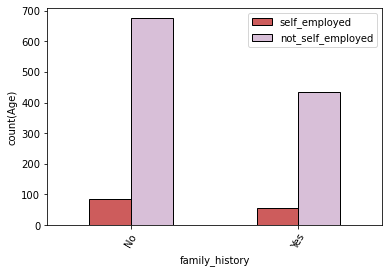

In [286]:
visualize_query('family_history','Age','count', 'self_employed_people', 'not_self_employed_people')

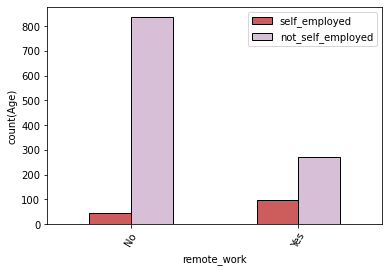

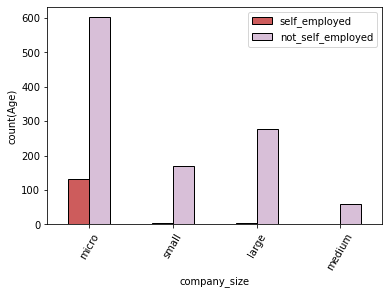

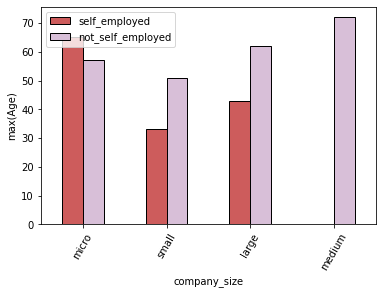

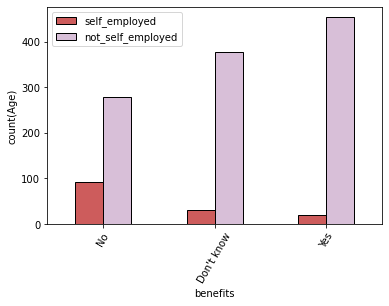

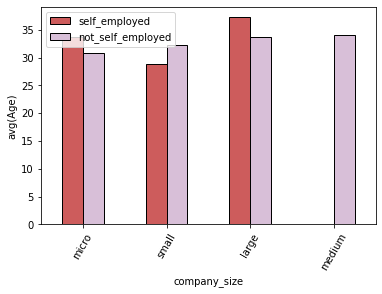

In [287]:
for row in topK_results:
    visualize_query(row[0][0], row[0][1], row[0][2], 'self_employed_people', 'not_self_employed_people')

[[('treatment', 'Age', 'count'), 0.3089243903615402], [('work_interfere', 'Age', 'count'), 0.27196889037381333], [('Country', 'Age', 'min'), 0.23635068237453694], [('Country', 'Age', 'avg'), 0.17181412277571564], [('Country', 'Age', 'max'), 0.13020427192010883]]


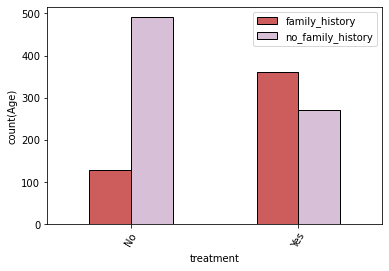

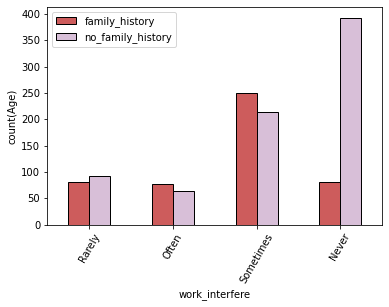

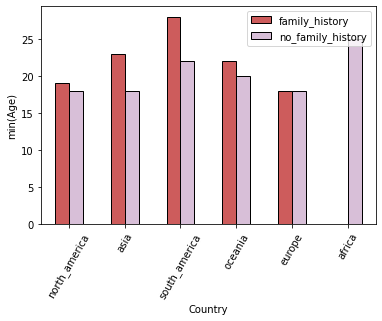

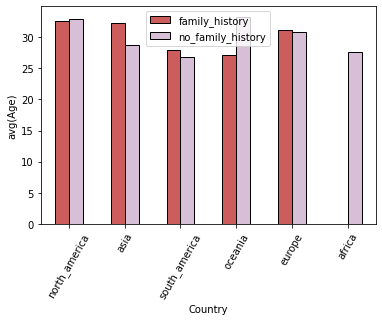

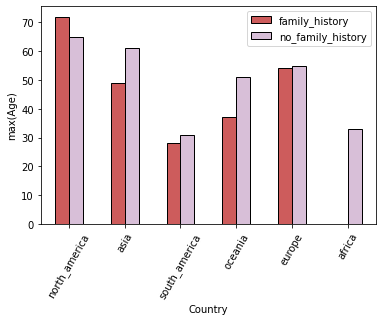

In [301]:
# for target and reference = family history
k = 5
aggregate_views_2 = generate_views_2()
results = execute_queries(aggregate_views_2, 'family_history_people', 'no_family_history_people')

topK_results = get_topK(results, k)
print(topK_results)
for row in topK_results:
    visualize_query_2(row[0][0], row[0][1], row[0][2], 'family_history_people', 'no_family_history_people')

[[('work_interfere', 'Age', 'count'), 1.0170688265925425], [('family_history', 'Age', 'count'), 0.3228300476193163], [('care_options', 'Age', 'count'), 0.16381755233444822], [('benefits', 'Age', 'count'), 0.10501400207977851], [('Gender', 'Age', 'count'), 0.09873983339464179]]


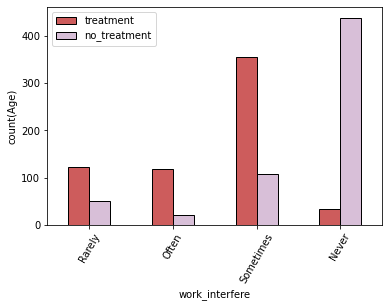

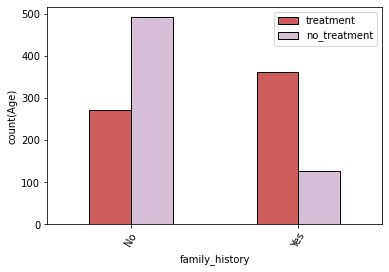

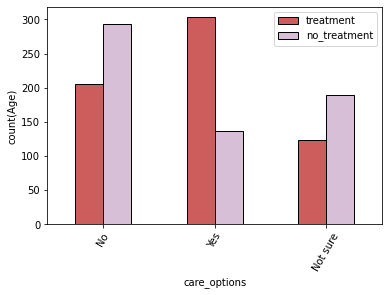

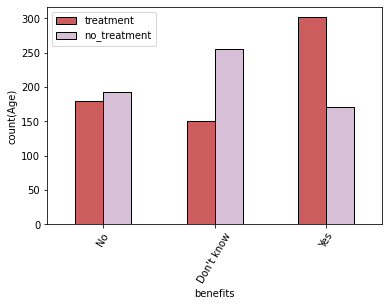

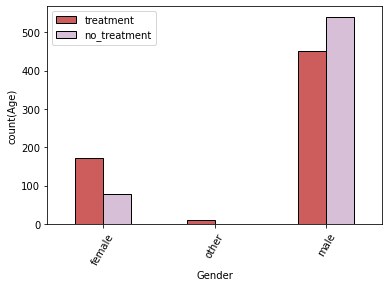

In [302]:
# for target and reference = treatment
k = 5
aggregate_views_3 = generate_views_3()
results = execute_queries(aggregate_views_3, 'treatment_people', 'no_treatment_people')

topK_results = get_topK(results, k)
print(topK_results)

for row in topK_results:
    visualize_query_3(row[0][0], row[0][1], row[0][2], 'treatment_people', 'no_treatment_people')

[[('self_employed', 'Age', 'count'), 0.26216746904011534], [('company_size', 'Age', 'count'), 0.08759756558584053], [('tech_company', 'Age', 'count'), 0.04343091070004196], [('Gender', 'Age', 'max'), 0.0368342539287299], [('leave', 'Age', 'count'), 0.02723386141609243]]


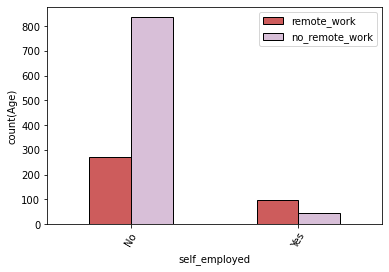

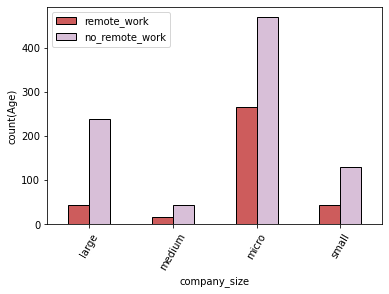

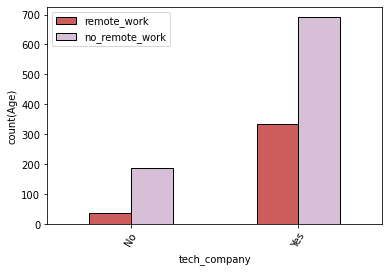

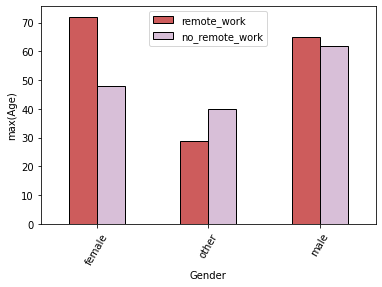

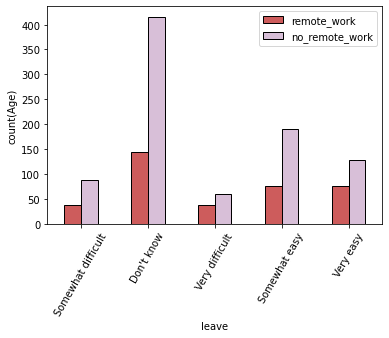

In [303]:
# for target and reference = remote work
k = 5
aggregate_views_4 = generate_views_4()
results = execute_queries(aggregate_views_4, 'remote_work_people', 'no_remote_work_people')

topK_results = get_topK(results, k)
print(topK_results)
for row in topK_results:
    visualize_query_4(row[0][0], row[0][1], row[0][2], 'remote_work_people', 'no_remote_work_people')

In [307]:
#Split data into partitions. This will be used in Pruning optimization. The number of partitions is assumed to be 10

import csv
import os
def split_csv(source_filepath, dest_folder, split_file_prefix,
                records_per_file):
    """
    Split a source csv into multiple csvs of equal numbers of records,
    except the last file.

    Includes the initial header row in each split file.

    Split files follow a zero-index sequential naming convention like so:

        `{split_file_prefix}_0.csv`
    """
    if records_per_file <= 0:
        raise Exception('records_per_file must be > 0')

    with open(source_filepath, 'r') as source:
        reader = csv.reader(source)
        headers = next(reader)

        file_idx = 0
        records_exist = True

        while records_exist:

            i = 0
            target_filename = f'{split_file_prefix}_{file_idx}.csv'
            target_filepath = os.path.join(dest_folder, target_filename)

            with open(target_filepath, 'w') as target:
                writer = csv.writer(target)

                while i < records_per_file:
                    if i == 0:
                        writer.writerow(headers)

                    try:
                        writer.writerow(next(reader))
                        i += 1
                    except StopIteration:
                        records_exist = False
                        break

            if i == 0:
                # we only wrote the header, so delete that file
                os.remove(target_filepath)

            file_idx += 1

In [312]:
partitions = 10
split_csv("./Downloads/survey_mht_clean.csv", "./Downloads/splitFiles", "employed", len(df)/partitions )

In [319]:
n_partitions = 10

# Create partitions 

for i in range(n_partitions):
    cur = conn.cursor()
    query = """create or replace view s{}_self_employed as 
                   select * from employed_{} where self_employed = 'Yes';
               create or replace view s{}_not_self_employed as 
                   select * from employed_{} where self_employed = 'No';""".format(i,i,i,i)
    cur.execute(query)
    conn.commit()
    
    
# Sharing based pruning for the current partition

def sharing_based_execution(views, partition):
    
    # For a particular groupby(a) combine all measure attributes
    
    groupby_dict = {}
    
    results = {}
    
    for a, m, f in views:
        
        if a not in groupby_dict:
            groupby_dict[a] = []
        
        groupby_dict[a].append(f + "(" + m + ")")
    
    for a in groupby_dict:
        
        temp = ','.join(groupby_dict[a])
        target_view = "select "+ a +", " + temp +" from s" + str(partition) + '_self_employed group by ' + a + ';'
        reference_view = "select "+ a +", " + temp +" from s" + str(partition) + '_not_self_employed group by '  + a + ';'
        
        cur1 = conn.cursor()
        cur2 = conn.cursor()
    
        cur1.execute(target_view)
        cur2.execute(reference_view)
        
        temp_target_output = cur1.fetchall()
        temp_ref_output = cur2.fetchall()
        for i in range(1, len(groupby_dict[a])+1):
            
            target_output = []
            reference_output = []
            
            for j in range(0, len(temp_target_output)):
                
                target_output.append((temp_target_output[j][0], temp_target_output[j][i]))
                
            for j in range(0, len(temp_ref_output)):
                
                reference_output.append((temp_ref_output[j][0], temp_ref_output[j][i]))
            
            res1, res2 = normalize(dict(target_output), dict(reference_output))
    
            utility_measure = calc_utility(res1, res2)
            
            if(math.isnan(utility_measure) or math.isinf(utility_measure)):
                continue
                
            ind1 = groupby_dict[a][i-1].find('(')
            ind2 = groupby_dict[a][i-1].find(')')
            m = groupby_dict[a][i-1][0:ind1]
            f = groupby_dict[a][i-1][ind1 + 1:ind2]
            results[(a,f,m)] = utility_measure
            
    return results

In [320]:
def update_CI(view, running_utility, confidence_intervals, i, delta):
    
    curr_mean = np.mean(running_utility[view])
    m = i+1
    N = 10
    eps =  np.sqrt((0.5/m)*(1-((m-1)/N))*(2*np.log(np.log(m))+np.log((np.pi**2)/(3*delta))))
    confidence_intervals[view] = [curr_mean - eps, curr_mean + eps]
    
    
def prune_views(views, k, confidence_intervals):
    
    confidence_intervals = dict(sorted(confidence_intervals.items(), key=lambda item: item[1][0], reverse = True))
    ref_bound = list(confidence_intervals.values())[k+14][0]

    del_views = []
    for view in reversed(confidence_intervals.keys()):
        
        if confidence_intervals[view][1] < ref_bound:
            del_views.append(view)
            if view in views:
                views.remove(view)
            
    for view in del_views:
        del confidence_intervals[view]
        

def CI_based_pruning(views, delta, k):
    
    running_utility = {}
    confidence_intervals = {}
    for partition in range(n_partitions):
        
        results = sharing_based_execution(views, partition)
        
        for view in results:
            
            if view not in running_utility:    
                running_utility[view] = []
                
            running_utility[view].append(results[view])
            
            if partition >= 1:
                update_CI(view, running_utility, confidence_intervals, i, delta)
        
        if partition >= 1:
            prune_views(views, k, confidence_intervals)
 

In [322]:
start_time = time.time()
pruning_views = generate_views()
CI_based_pruning(pruning_views, 0.05, 5)
results = execute_queries(pruning_views, 'self_employed_people', 'not_self_employed_people')
print(get_topK(results, 5))
print("\n\n--- Execution time is %s seconds ---" % (time.time() - start_time))

[[('remote_work', 'Age', 'count'), 0.45180686315612345], [('company_size', 'Age', 'count'), 0.3976369200408188], [('company_size', 'Age', 'max'), 0.3872428726404401], [('benefits', 'Age', 'count'), 0.37885206325491383], [('company_size', 'Age', 'avg'), 0.3065237200878724]]


--- Execution time is 0.33133912086486816 seconds ---


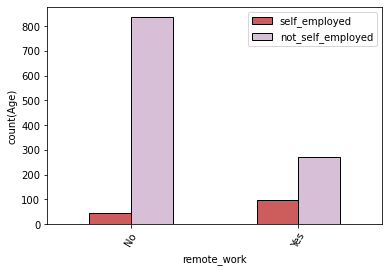

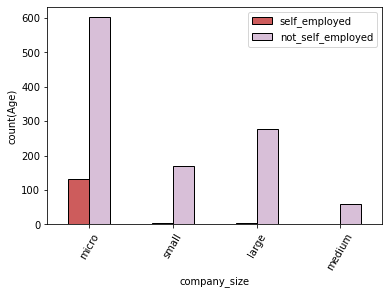

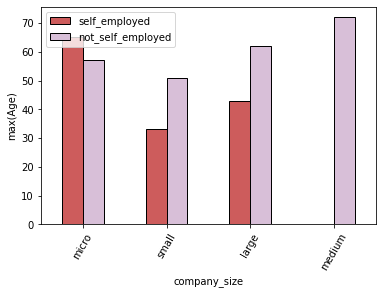

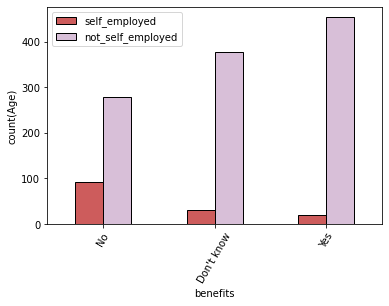

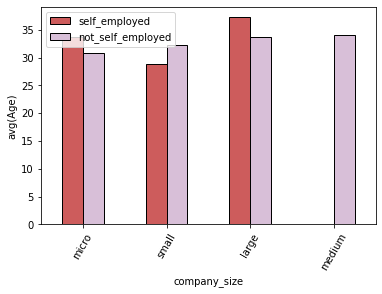

In [329]:
for row in topK_results:
    visualize_query(row[0][0], row[0][1], row[0][2], 'self_employed_people', 'not_self_employed_people')